In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [2]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:xlabel='TV', ylabel='Sales'>

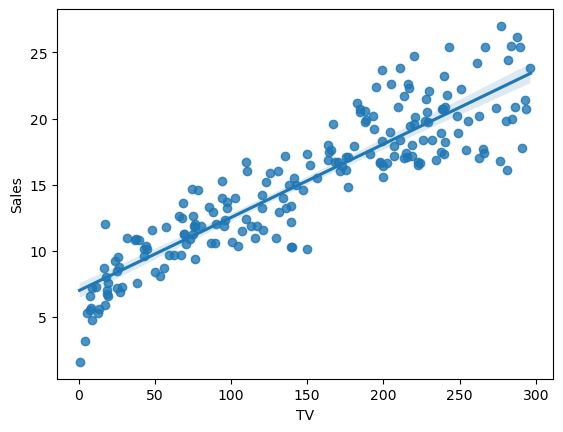

In [3]:
sns.regplot(x= 'TV', y= 'Sales',data = advertising)

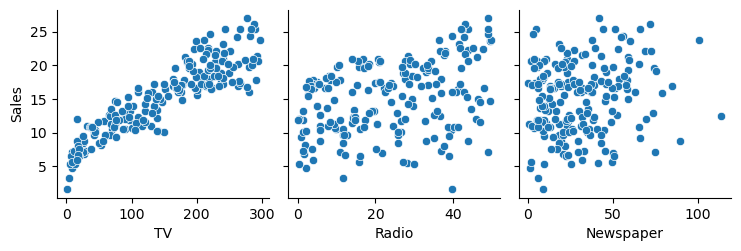

In [4]:
sns.pairplot(data = advertising, x_vars = ['TV','Radio','Newspaper'], y_vars = ['Sales'])

In [5]:
X = advertising['TV']
Y = advertising['Sales']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y ,train_size=0.70, random_state= 100)

In [7]:
#training the model by using statsmodels.
x_train_sm = sm.add_constant(x_train)
x_train_sm
#the constant is the intercept from y= mx+c , in 90% of cases we use add_constant.

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [8]:
# fitting the model.

lr = sm.OLS(y_train, x_train_sm)
#here ols stands for ordinary least squares, which minimizes the the error b/w actual point and predicted point.
lr_model = lr.fit()

In [9]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [10]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 25 May 2024   Prob (F-statistic):           1.52e-52
Time:                        13:55:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

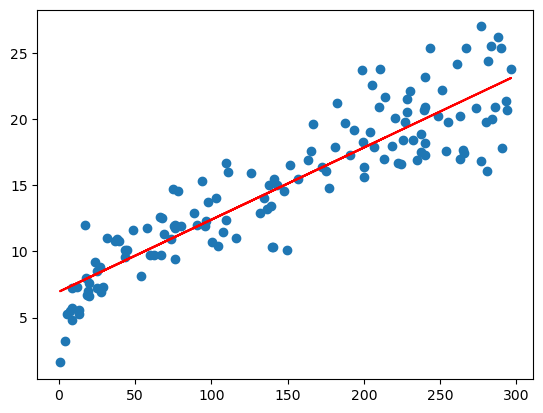

In [11]:
# evaluating the model by visualizing it.

plt.scatter(x_train , y_train)
plt.plot(x_train, 6.9487 + 0.0545 * x_train, 'r')

In [12]:
# now instead of this calculation ie-6.9487 + 0.0545 * x_train we can write this.

y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

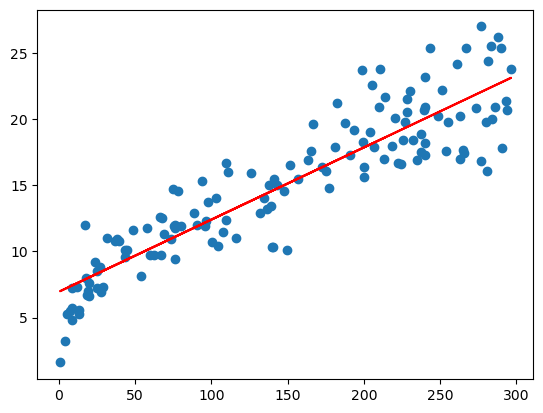

In [13]:
#Now we can put y_train_pred instead of 6.9487 + 0.0545 * x_train.

plt.scatter(x_train , y_train)
plt.plot(x_train,y_train_pred, 'r')


# Residual Analysis.

In [14]:
# error analysis.

res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

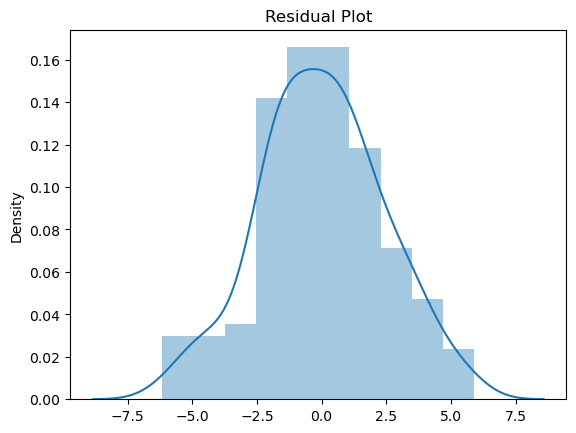

In [15]:
# plotting the residuals.

plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

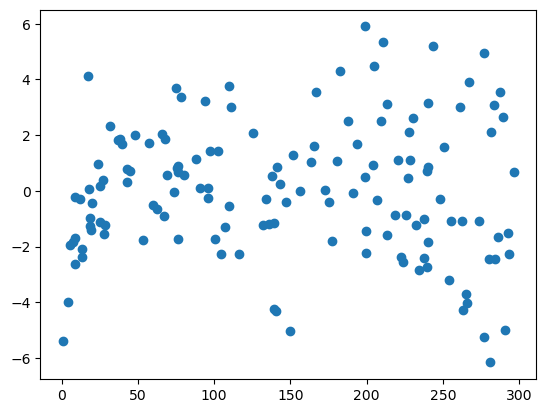

In [16]:
#look for patterns in the residual.(we should not be able to identify)

plt.scatter(x_train, res)

# Prediction and evaluation on the test set.

In [17]:
#add a constraint intercept to test.
x_test_sm = sm.add_constant(x_test)
x_test_sm
#pred on test.
y_test_pred = lr_model.predict(x_test_sm)
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [18]:
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7921031601245658

In [19]:
# checking the same for train set
r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
r2

0.8157933136480389

In [20]:
mean_squared_error(y_true= y_test, y_pred= y_test_pred)

4.077556371826956

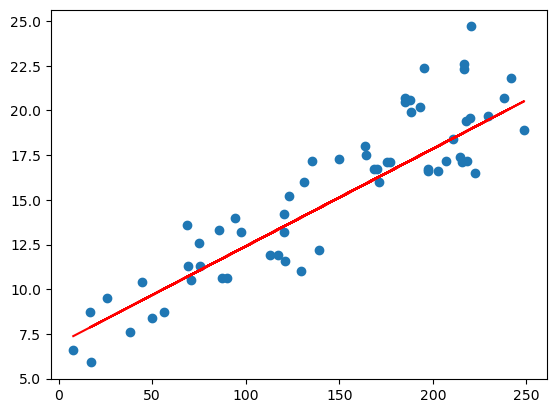

In [21]:
plt.scatter(x_test , y_test)
plt.plot(x_test,y_test_pred, 'r')